In [124]:
from funcs import * # user defined helper functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### ---Get Specific Climate Data---
#### get_clim_data(file,kind='p50',temporal=True,ro=False)
kind referes to the subtype in the larger model. p50 is assumped.</br>
Use temporal=False only the case of monthly data, i.e. those files with 'month' in their title.</br>
Use ro=True to round to nearest integer values.

In [2]:
get_clim_data('leth-tmax.csv').head(10)

,rcp26,rcp45,rcp85
time,,,
1950,5.8,5.8,5.8
1951,3.4,3.4,3.4
1952,3.7,3.7,3.7
1953,3.4,3.4,3.4
1954,4.9,4.9,4.9
1955,4.5,4.5,4.5
1956,5.8,5.8,5.8
1957,4.1,4.1,4.1
1958,3.1,3.1,3.1


In [3]:
get_clim_data('leth-month-total-precip.csv',temporal=False).head(10)

,rcp26,rcp45,rcp85
time,,,
1950-01,23.312,23.372,23.226
1950-02,24.014,23.090,23.258
1950-03,18.458,18.404,18.360
1950-04,37.332,37.622,37.590
1950-05,43.494,43.936,43.934
1950-06,72.342,71.154,71.946
1950-07,23.690,23.730,23.878
1950-08,35.390,33.434,33.434
1950-09,34.764,34.842,34.878


### ---Choose province and crop type ---
#### crop_dict(crop_type, province)
Available provinces: Alberta, Saskatchewan, and British Columbia </br>
Available crops: Barley, Canola, Mustard seed, and Wheat, all </br></br>
Use spelling precisely as given above. </br></br>
Returns a dictionary whose keys are the climate models rcp26, rcp45, and rcp85. </br>

In [94]:
crop = crop_dict('Barley','Alberta')
crop['rcp26']

,kg/hec,days > 32,frost free days,precipitation,mean temperature
time,,,,,
1976,2400.0,1.266667,117.966667,240.835333,64.772667
1977,2500.0,1.700000,122.933333,242.770667,63.342000
1978,2400.0,2.233333,121.166667,241.368667,64.820667
1979,2500.0,1.066667,122.333333,252.956000,64.345333
1980,2700.0,1.666667,120.233333,267.720667,63.804667
1981,2700.0,2.466667,120.600000,238.856000,64.137333
1982,2700.0,1.600000,123.966667,275.833333,63.194000
1983,2500.0,0.666667,121.966667,278.699333,63.237333
1984,2200.0,1.800000,123.366667,255.732667,65.346000


In [81]:
first = get_clim_data('leth-first-fall-frost.csv')
last = get_clim_data('leth-last-spring-frost.csv')

In [10]:
frost = first - last

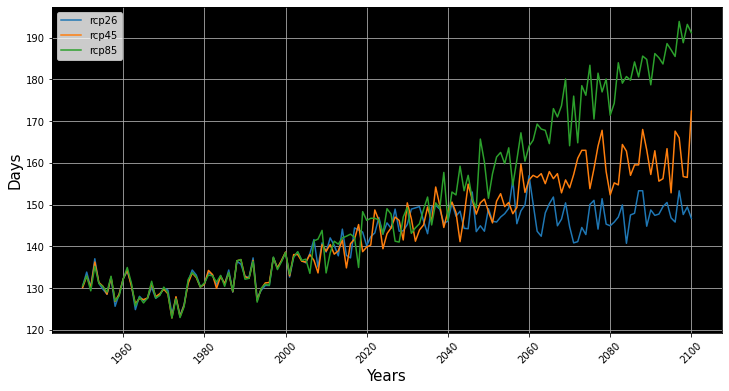

In [39]:
fig, ax = plt.subplots()
frost.plot(kind='line',figsize=(12,6),rot=45,ax=ax,grid=True)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Days',fontsize=15)
#plt.suptitle('Consecutive Frost Free Days in Alberta',fontsize=20)
ax.set_facecolor('black')

In [82]:
to_month(last)
to_month(first)

In [161]:
df = pd.DataFrame()
df.index = frost.index
df['spring'] = last['rcp26']
df['fall'] = first['rcp26']

In [168]:
temp = get_clim_data('leth-month-tmean.csv',temporal=False)
precip = get_clim_data('leth-month-total-precip.csv',temporal=False)
tmax = get_clim_data('leth-tmax.csv')

In [157]:
#DF = pd.DataFrame()
#DF.index = frost.index
DF['rcp85'] = get_tmean(df,temp,'rcp85')

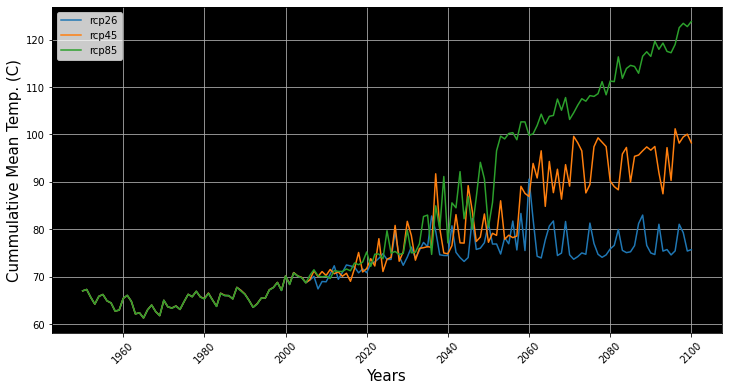

In [93]:
fig, ax = plt.subplots()
DF.plot(kind='line',figsize=(12,6),rot=45,ax=ax,grid=True)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Cummulative Mean Temp. (C)',fontsize=15)
#plt.suptitle('Consecutive Frost Free Days in Alberta',fontsize=20)
ax.set_facecolor('black')

In [103]:
DF2 = pd.DataFrame()
DF2.index = crop['rcp26'].index
DF2['yield'] = crop['rcp26']['kg/hec']

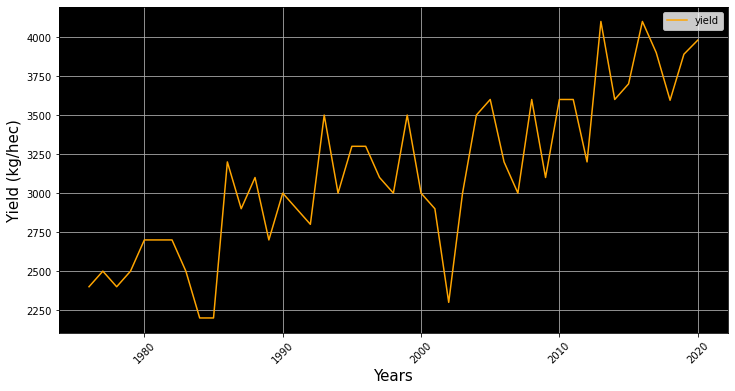

In [110]:
fig, ax = plt.subplots()
DF2.plot(kind='line',figsize=(12,6),rot=45,ax=ax,grid=True,color='orange')
plt.xlabel('Years',fontsize=15)
plt.ylabel('Yield (kg/hec)',fontsize=15)
#plt.suptitle('Consecutive Frost Free Days in Alberta',fontsize=20)
ax.set_facecolor('black')

In [113]:
crops = crop['rcp26'].reset_index(drop=False)

In [120]:
x = crops.drop('kg/hec',axis=1)
y = crops['kg/hec']

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [126]:
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [127]:
y_prediction =  LR.predict(x_test)
y_prediction

array([3596.67144581, 3175.07084018, 3142.64303111, 3725.83058509,
       3495.47364008, 3591.45417341, 2534.13633685, 2707.45080507,
       2616.49549365])

In [131]:
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.6337420049193293
mean_sqrd_error is== 142726.67114965868
root_mean_squared error of is== 377.79183573716716


In [143]:
coeff = LR.coef_

In [196]:
x.head()

,time,days > 32,frost free days,precipitation,mean temperature
0,1976,1.266667,117.966667,240.835333,64.772667
1,1977,1.700000,122.933333,242.770667,63.342000
2,1978,2.233333,121.166667,241.368667,64.820667
3,1979,1.066667,122.333333,252.956000,64.345333
4,1980,1.666667,120.233333,267.720667,63.804667


In [256]:
proj = pd.DataFrame()
proj.index = frost.index
proj['yield'] = crop['rcp85']['kg/hec']
proj['tmean'] = DF['rcp85']
proj['precip'] = get_precip(df,precip,'rcp85')
proj['days > 32'] = tmax['rcp85']
proj['frost'] = frost['rcp85']

In [257]:
proj['yield'] = proj['yield'].fillna(0)

In [258]:
for index in proj.index:
    if proj.loc[index,'yield'] == 0:
        proj.loc[index,'yield'] = LR.intercept_ + coeff[0]*index + coeff[1]*proj.loc[index,'days > 32'] + \
        coeff[2]*proj.loc[index,'frost'] + coeff[3]*proj.loc[index,'precip'] + coeff[4]*proj.loc[index,'tmean']

In [259]:
proj

,yield,tmean,precip,days > 32,frost
time,,,,,
1950,524.348310,67.024,208.070,5.8,130.5
1951,728.569075,67.320,239.678,3.4,132.9
1952,844.879907,65.654,248.992,3.7,129.3
1953,810.333726,64.230,242.440,3.4,135.2
1954,775.018063,65.866,251.070,4.9,131.1
...,...,...,...,...,...
2096,75.641027,118.992,268.284,58.2,185.5
2097,-742.232817,122.526,277.408,64.6,193.9
2098,-1536.062021,123.446,279.738,74.3,188.8


In [246]:
K = pd.DataFrame()
K.index = proj.index

In [247]:
K['rcp26'] = proj['yield']

In [253]:
K['rcp45'] = proj['yield']

In [261]:
K['rcp85'] = proj['yield']

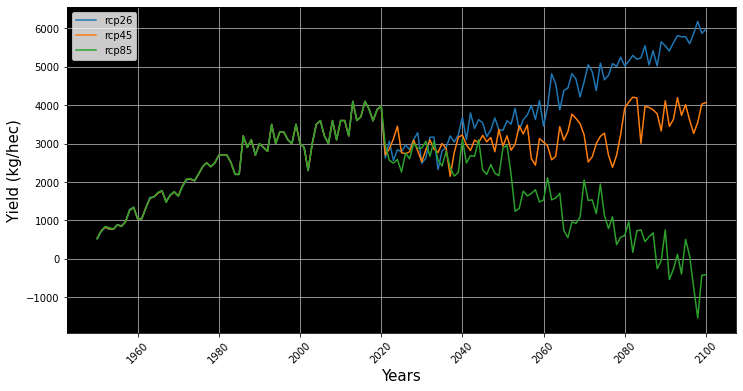

In [262]:
fig, ax = plt.subplots()
K.plot(kind='line',figsize=(12,6),rot=45,ax=ax,grid=True)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Yield (kg/hec)',fontsize=15)
#plt.suptitle('Consecutive Frost Free Days in Alberta',fontsize=20)
ax.set_facecolor('black')